<a href="https://colab.research.google.com/github/MailenGonzalez/Aprendizaje-de-maquina_UNS/blob/main/TP2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico 2 - Aprendizaje de Máquinas

*Realizado por Mailen Gonzalez*



## Parte 1
En esta parte del trabajo se analizan dos dataset, uno muestra la evolucion de la enfermedad COVID 19 y en el otro se muestra la evolución de la ocupación de las camas de hospital, ambos en la ciudad de Bahía Blanca.

El objetivo de esta parte es analizar ambos conjuntos de datos con respecto al tiempo y ver como se comportan y detectar anomalías.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn import metrics

*Cargamos los archivos de camas ocupadas y casos de COVID*

In [ ]:
path_camas = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv'
path_casos = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv'
camas = pd.read_csv(path_camas)
casos = pd.read_csv(path_casos)

*Analizamos el dataset de las Camas Ocupadas:*

In [ ]:
camas.head()

,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,131,2020-09-25,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4,NaN
1,130,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN
2,129,2020-09-23,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
3,128,2020-09-22,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
4,127,2020-09-21,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN


In [ ]:
camas.describe()

,informeNumero,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,70.670455,817.500000,350.159091,40.920455,162.068182,19.647727,34.909091,32.795455,31.636364,8.170455,137.181818,24.284091,39.943182,8.386364,144.159091,5.170455,3.715909
std,42.113072,155.002113,77.216502,9.006028,18.349603,6.586367,21.706843,15.509107,1.598719,7.014307,26.004220,8.541917,27.322408,7.529912,4.535648,4.334363,0.453565
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137.000000,0.000000,3.000000
25%,30.750000,848.000000,325.750000,38.000000,163.000000,15.750000,20.000000,22.000000,32.000000,3.000000,142.000000,20.000000,0.000000,0.000000,137.000000,3.000000,3.000000
50%,87.500000,848.000000,367.500000,43.000000,163.000000,18.000000,25.000000,26.500000,32.000000,4.500000,142.000000,25.000000,54.000000,7.500000,147.000000,4.000000,4.000000
75%,109.250000,848.000000,391.000000,46.000000,163.000000,23.000000,52.250000,44.250000,32.000000,13.250000,142.000000,28.000000,62.000000,14.000000,147.000000,6.000000,4.000000
max,131.000000,851.000000,450.000000,53.000000,177.000000,42.000000,86.000000,77.000000,33.000000,24.000000,143.000000,43.000000,72.000000,25.000000,147.000000,21.000000,4.000000


<Figure size 432x288 with 0 Axes>

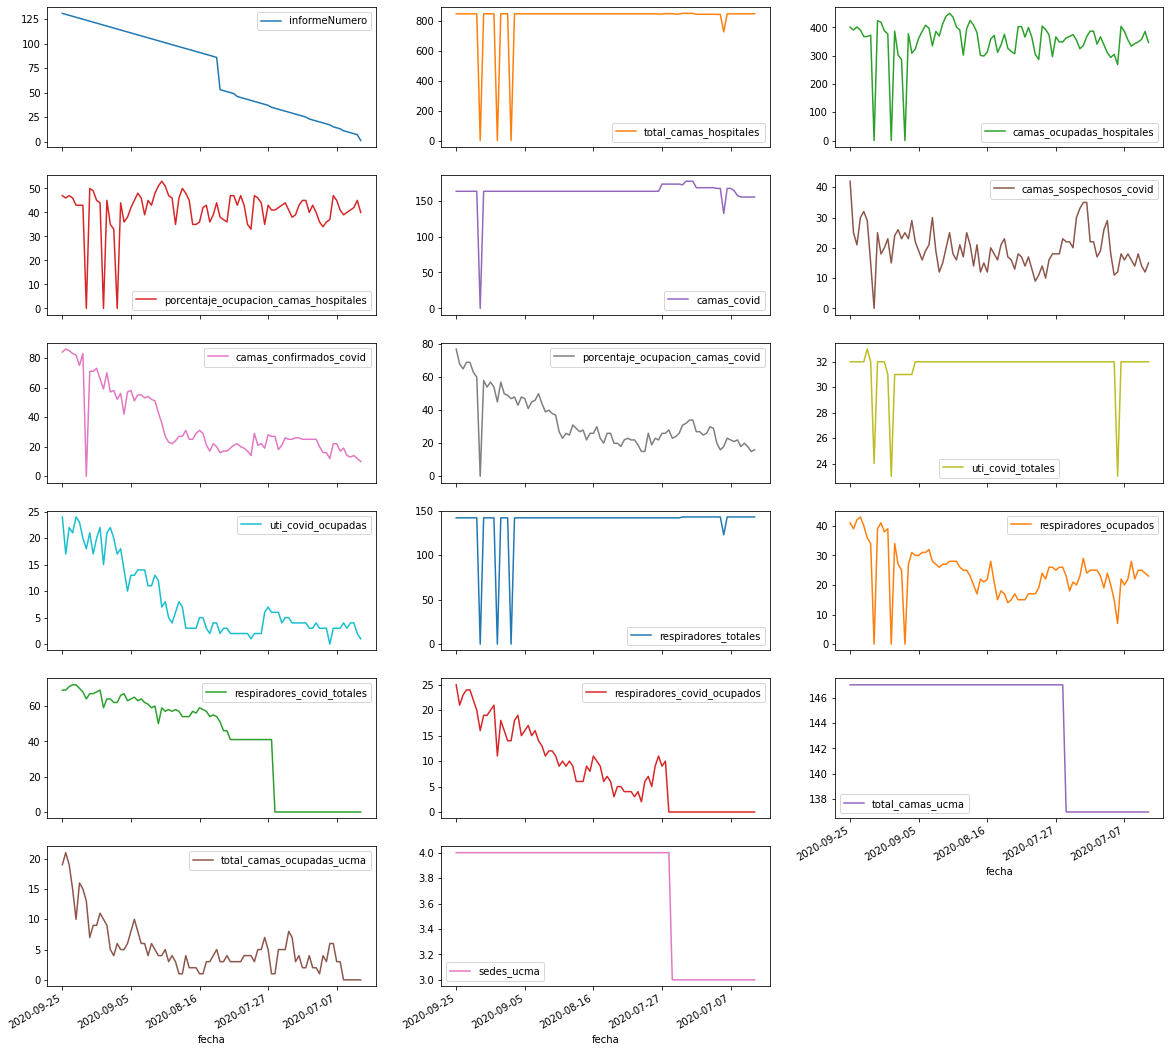

In [ ]:
plt.figure()
camas.set_index('fecha', inplace=True)
camas.plot(label='fecha', subplots=True, legend=True, figsize=(20,20), layout=(6, 3))
plt.show()

En los graficos anteriores se pueden ver como evolucionan las variables. 
En este tipo de gráficos es mas facil distinguir outliers o valores mal cargados, ya que aparecen picos o un valor muy distinto que no se parece al universo. Por ejemplo en "Porcentaje_ocupacion_camas_hospitales", vemos que 3 veces el valor es 0, lo que corresponde a un error, ya que vemos que la curva tiene otro comportamiento. 
Además este tipo de gráfico nos permite ver como es la evolución de la ocupacion de camas respecto del tiempo. 

<Figure size 432x288 with 0 Axes>

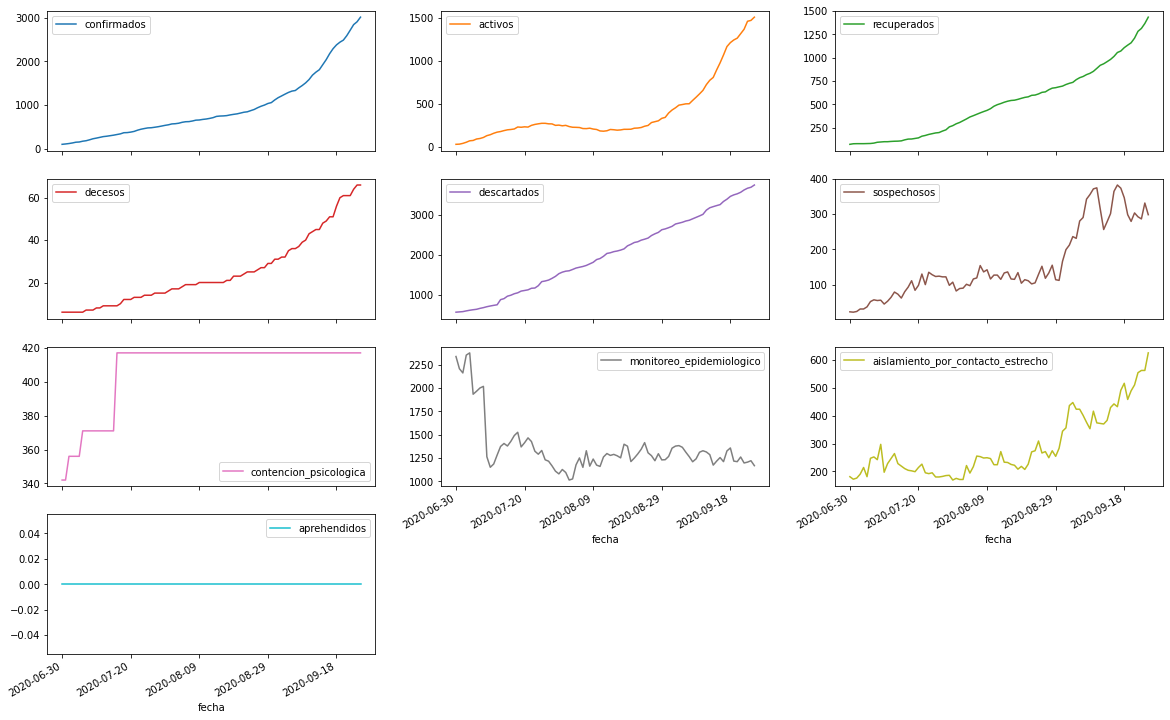

In [ ]:
plt.figure()
casos.set_index('fecha', inplace=True)
casos.plot(label='fecha',subplots=True, legend=True, figsize=(20,20), layout=(6, 3))
plt.show()

En estos graficos, también en funcion del tiempo, no se ven valores outliers o mal cargados. Las distribuciones parecen ser normales, salvo en la variable aprehendidos que siempre tiene un valor 0 y contencion psicologica que tiene su valor cambia muy pocas veces. 


## Parte 2

La idea de este trabajo es generar un dataset (dos conjuntos Gaussianos con diferente media y ds, con 50 elementos). Y utilizar una curva ROC para proponer un umbral para un clasificador por minimo error. Además evaluar algunos parámetros de calidad (exactitud, precisión, f-measure). 



In [ ]:
def create_datasets(mean_a, mean_b, ds_a, ds_b):
  size = 50
  data_a = pd.DataFrame(dict(x=np.random.normal(mean_a, ds_a, size), y = 'a'))
  data_b = pd.DataFrame(dict(x=np.random.normal(mean_b, ds_b, size), y = 'b'))
  plt.hist([data_a.iloc[:, 0], data_b.iloc[:, 0]], color=['orange', 'green'], bins=50)
  plt.title('Histograms')
  plt.show()
  data = pd.concat( [data_a,data_b] )
  return data

In [112]:
def get_ROC(dataset):

  fpr, tpr, thresholds = metrics.roc_curve(dataset.iloc[:, 1], dataset.iloc[:, 0], pos_label='a')
  roc_auc = metrics.auc(fpr, tpr)
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  

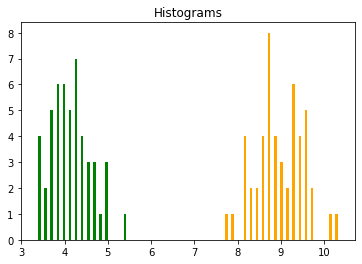

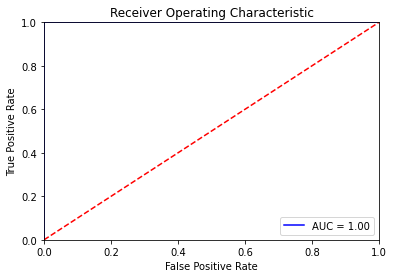

In [141]:
#@title Seleccione los parámetros de los datasets {run:"auto"}
mean_a = 9 #@param {type:"slider", min:1, max:10, step:0.5}
ds_a = 0.6 #@param {type:"slider", min:0, max:2, step:0.1}
mean_b = 4 #@param {type:"slider", min:1, max:10, step:0.5}
ds_b = 0.5 #@param {type:"slider", min:0, max:2, step:0.1}

dataset = create_datasets(mean_a, mean_b, ds_a, ds_b)
get_ROC(dataset)

Si generamos dos datasets cuyas medias valores se encuentren distanciados (es decir que alejamos las medias y usamos un ds suficientemente chico), vemos que el AUC se acerca y muchas veces alcanza el 1. En cambio cuando los valores de ambas categorias se solapan, es mas dificil distinguirlos y el valor de area sobre la curva baja, alcanzando valores de 0.5 que es el peor de los casos (ya que es lo mismo que arrojar una moneda).